# Klasifikasi dengan ektraksi fitur menggunakan Latent Dirichlet Allocation (LDA)

In [4]:
import pandas as pd

# Baca file CSV langsung dari folder utama
data = pd.read_csv('tempo_berita.csv', on_bad_lines='skip')

# Tampilkan 5 baris pertama
data.head()


,id_berita,judul_berita,isi_berita,kategori_berita
0,2079590,"Profil Wahyu Yudhayana, Mantan Pelindung SBY y...",BRIGADIR JenderalWahyu Yudhayanamenduduki jaba...,politik
1,2079589,"Antisipasi Keracunan MBG, Pemkot Bandung Bentu...",PEMERINTAH Kota Bandung akan membentuk satuan ...,politik
2,2079584,Mutasi TNI: Wahyu Yudhayana Jabat Sekretaris M...,PANGLIMATNIJenderal Agus Subiyanto kembali mel...,politik
3,2079578,Relawan Prabowo akan Ikut Mengawasi SPPG,KELOMPOK organisasi relawan pendukung Presiden...,politik
4,2079574,Trans7 Minta Maaf atas Tayangan yang Singgung ...,STASIUN televisi swastaTrans7meminta maaf atas...,politik


In [5]:
# Perbaikan untuk menghindari SettingWithCopyWarning
data_text = data.loc[:, ['isi_berita']]
# Tetapkan DataFrame yang sudah dimodifikasi ke variabel 'documents'.
documents = data_text
# Tampilkan semua baris data
print(documents)

                                            isi_berita
0    BRIGADIR JenderalWahyu Yudhayanamenduduki jaba...
1    PEMERINTAH Kota Bandung akan membentuk satuan ...
2    PANGLIMATNIJenderal Agus Subiyanto kembali mel...
3    KELOMPOK organisasi relawan pendukung Presiden...
4    STASIUN televisi swastaTrans7meminta maaf atas...
..                                                 ...
895  TIM nasional Indonesia membidik satu tiket lol...
896  PELATIH tim nasional Arab Saudi, Herve Renard,...
897  PSSI menerima keputusan Konfederasi Sepak Bola...
898  FIFA dan Konfederasi Sepak Bola Asia (AFC) men...
899  PELATIHTimnas IndonesiaPatrick Kluivert ingin ...

[900 rows x 1 columns]


In [6]:
len(documents)

900

## Data Prepocessing

In [11]:
!pip install --upgrade gensim numpy scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00


In [1]:
pip uninstall numpy -y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [2]:
pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [3]:
pip install gensim nltk

In [4]:
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem.porter import *
import numpy as np

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :

        if token not in stopwords.words('english') and len(token) > 3:

            result.append(lemmatize_stemming(token))
    return result

In [7]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

# Unduh data NLTK
nltk.download('stopwords')
nltk.download('wordnet')

try:
    # Muat data dari file CSV
    data = pd.read_csv('tempo_berita.csv', on_bad_lines='skip')

    # KUNCI PERBAIKAN: Pastikan documents adalah list of strings
    documents = data['isi_berita'].values.tolist()

    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []


# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    # --- Bagian 3: Mencoba Mengakses Dokumen Tertentu ---
    # Tentukan nomor dokumen yang ingin diambil
    # Berdasarkan output, total dokumen adalah 900
    document_num = 500

    # Cek apakah nomor dokumen valid
    if 1 <= document_num <= len(documents):
        # Ambil dokumen menggunakan indeks list (document_num - 1)
        doc_sample = documents[document_num - 1]

        print("\nOriginal document:")
        words = doc_sample.split()
        print(words)

        print("\n\nTokenized and lemmatized document:")
        print(tokenisasi_dan_filter(doc_sample))
    else:
        print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total 900 dokumen berhasil dimuat.

Original document:
['PANGERAN', 'Williambaru-baru', 'ini', 'membuat', 'pernyataan', 'mengejutkan', 'tentang', 'masa', 'kecilnya.', 'Dalam', 'wawancara', 'eksklusif,', 'pewaris', 'takhta', 'Inggris', 'ini', 'mengaku', 'tidak', 'ingin', 'mengulangi', 'kesalahan', 'yang', 'dilakukan', 'oleh', 'orang', 'tuanya,Raja', 'Charles', 'IIIdan', 'mendiang', 'Putri', 'Diana,', 'terutama', 'dalam', 'membesarkan', 'anak-anaknya.', 'Pilihan', 'Editor:Mengenang', 'Putri', 'Diana,', 'Kisah', 'Hidup', 'dan', 'Kepergiannya', 'yang', 'Tragis', 'Dilansir', 'dariPeople,', 'sebagai', 'anak', 'dari', 'pasangan', 'kerajaan', 'paling', 'terkenal', 'di', 'dunia,', 'Pangeran', 'William', 'tumbuh', 'di', 'tengah', 'sorotan', 'publik', 'yang', 'intens.', 'Perceraian', 'Raja', 'Charles', 'III', 'danPutri', 'Dianapada', '1996', 'karena', 'kehadiran', 'Camilla', 'Parker', 'Bowles', 'yang', 'kini', 'menjadi', 'ratu', 'itu', 'meninggalkan', 'jejak', 'mendalam', 'dalam', 'hidupnya.', 'W

In [8]:
processed_docs = [preprocess(doc) for doc in data['isi_berita'].values]

In [9]:
processed_docs = data['isi_berita'].apply(preprocess)

print(processed_docs[:900])

0      [brigadir, jenderalwahyu, jabatan, baru, sebag...
1      [pemerintah, kota, bandung, akan, membentuk, s...
2      [agus, subiyanto, kembali, melakukan, mutasi, ...
3      [kelompok, organisasi, relawan, pendukung, aka...
4      [stasiun, televisi, swastatrans, meminta, maaf...
                             ...                        
895    [nasional, indonesia, membidik, satu, tiket, l...
896    [pelatih, nasional, arab, saudi, herve, renard...
897    [pssi, menerima, keputusan, konfederasi, sepak...
898    [fifa, konfederasi, sepak, bola, asia, menolak...
899    [pelatihtimnas, kluivert, ingin, timnya, berma...
Name: isi_berita, Length: 900, dtype: object


## Get a BOW Dict from data

In [10]:
dictionary = gensim.corpora.Dictionary(processed_docs)

# Kode ini akan mengiterasi dan mencetak semua item dalam kamus
for k, v in dictionary.items():
    print(k, v)

0 aceh
1 agus
2 agustus
3 akademi
4 angkatan
5 apbn
6 bambang
7 bantuan
8 barat
9 baru
10 beberapa
11 bertugas
12 besar
13 biro
14 bisakah
15 brigadir
16 dalam
17 darat
18 darfur
19 dari
20 detasemen
21 diduduki
22 diduki
23 diisi
24 dimintai
25 dinas
26 direktorat
27 direktur
28 dirinya
29 distrik
30 ditandatangani
31 ditinggalkan
32 doanya
33 donny
34 editor
35 elite
36 ferdinand
37 frega
38 garuda
39 grup
40 hasanuddin
41 hingga
42 infanteri
43 infohan
44 informasi
45 inkiriwang
46 intelijen
47 jabatan
48 jakarta
49 jawa
50 jenderal
51 jenderalwahyu
52 juga
53 juli
54 kadispenad
55 karier
56 karo
57 kata
58 kebijakan
59 kelahiran
60 kementerian
61 kemudian
62 kepala
63 keputusan
64 khoziny
65 kodam
66 kolonel
67 komandan
68 komando
69 konflik
70 kontingen
71 kosasih
72 lainnya
73 lalu
74 lingkungan
75 lulus
76 magelang
77 markas
78 matra
79 mayor
80 melakukan
81 memulai
82 mendanai
83 menduduki
84 menengah
85 menggantikan
86 menjabat
87 merangkap
88 merupakan
89 militer
90 militerny

## Filter the Dict

In [11]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)

## Convert document into BOW format by doc2bow

In [12]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [13]:
# Buat kamus (dictionary) untuk menyimpan total hitungan kata
total_word_counts = {}

# Iterasi melalui setiap dokumen di bow_corpus
for bow_doc in bow_corpus:
    # Iterasi melalui setiap pasangan word_id dan count dalam dokumen
    for word_id, count in bow_doc:
        # Dapatkan kata asli dari dictionary
        word = dictionary[word_id]

        # Tambahkan hitungan ke total word counts
        if word in total_word_counts:
            total_word_counts[word] += count
        else:
            total_word_counts[word] = count

# Urutkan kata-kata berdasarkan total hitungannya secara menurun
sorted_words = sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True)

# Cetak hitungan kata yang digabungkan untuk semua dokumen
print("Total hitungan kata untuk semua dokumen:")
for word, count in sorted_words:
    print(f"Kata '{word}' muncul {count} kali.")

Total hitungan kata untuk semua dokumen:
Kata 'israel' muncul 770 kali.
Kata 'gaza' muncul 590 kali.
Kata 'saudi' muncul 347 kali.
Kata 'palestina' muncul 331 kali.
Kata 'trump' muncul 318 kali.
Kata 'irak' muncul 284 kali.
Kata 'prabowo' muncul 280 kali.
Kata 'senjata' muncul 277 kali.
Kata 'korban' muncul 274 kali.
Kata 'sesi' muncul 249 kali.
Kata 'detik' muncul 247 kali.
Kata 'perusahaan' muncul 244 kali.
Kata 'sekolah' muncul 234 kali.
Kata 'alex' muncul 232 kali.
Kata 'triliun' muncul 228 kali.
Kata 'serangan' muncul 226 kali.
Kata 'hamas' muncul 226 kali.
Kata 'tanah' muncul 223 kali.
Kata 'babak' muncul 219 kali.
Kata 'bola' muncul 216 kali.
Kata 'race' muncul 216 kali.
Kata 'kluivert' muncul 212 kali.
Kata 'gelar' muncul 211 kali.
Kata 'tersangka' muncul 210 kali.
Kata 'gencatan' muncul 209 kali.
Kata 'utara' muncul 209 kali.
Kata 'pelatih' muncul 206 kali.
Kata 'latihan' muncul 201 kali.
Kata 'dana' muncul 194 kali.
Kata 'grup' muncul 192 kali.
Kata 'hidup' muncul 191 kali.
K

## TF-IDF on our document set

In [14]:
tfidf = gensim.models.TfidfModel(bow_corpus)

In [15]:
corpus_tfidf = tfidf[bow_corpus]

In [16]:
for doc in corpus_tfidf:
    print(doc)

[(0, 0.07642891167368356), (1, 0.05386480302139023), (2, 0.07215273895803596), (3, 0.05358423342579864), (4, 0.07806109643730355), (5, 0.08875412225500595), (6, 0.31929596112535), (7, 0.08383951598566115), (8, 0.08875412225500595), (9, 0.06455782883909264), (10, 0.07281023301954866), (11, 0.061162750231438696), (12, 0.08076134090882209), (13, 0.0817403649932171), (14, 0.10716846685159728), (15, 0.053307193101171435), (16, 0.6178391022099639), (17, 0.27512125238101565), (18, 0.05171437280809509), (19, 0.08616001974991391), (20, 0.055627696865424195), (21, 0.08496922080880184), (22, 0.10142618119215879), (23, 0.0798239902813375), (24, 0.08875412225500595), (25, 0.1382619289272702), (26, 0.058221799370516227), (27, 0.08741890040028084), (28, 0.06857335454341629), (29, 0.07348796081276109), (30, 0.21268157492300716), (31, 0.1716386133582018), (32, 0.09017554545423757), (33, 0.06038988442676567), (34, 0.055627696865424195), (35, 0.08276494114225996), (36, 0.2812407198104695), (37, 0.0764289

In [17]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=900, id2word = dictionary, passes = 50, workers=2)

In [18]:
for idx, topic in lda_model.print_topics():
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 82 
Words: 0.095*"pangan" + 0.079*"jabatan" + 0.075*"keputusan" + 0.064*"prabowo" + 0.051*"arief" + 0.049*"prasetyo" + 0.048*"ditetapkan" + 0.033*"ketentuan" + 0.027*"pemerintahan" + 0.027*"dokumen"


Topic: 154 
Words: 0.078*"perusahaan" + 0.039*"saham" + 0.037*"menyelesaikan" + 0.034*"keuangan" + 0.034*"ibrahim" + 0.034*"bank" + 0.033*"berdampak" + 0.028*"barang" + 0.023*"pernyataan" + 0.022*"berdiri"


Topic: 488 
Words: 0.086*"detik" + 0.043*"race" + 0.043*"sesi" + 0.029*"juli" + 0.029*"alex" + 0.029*"team" + 0.029*"unggul" + 0.029*"tercepat" + 0.014*"lambat" + 0.014*"disusul"


Topic: 670 
Words: 0.112*"pula" + 0.091*"polisi" + 0.058*"menggelar" + 0.055*"turut" + 0.050*"aksi" + 0.043*"belakangan" + 0.040*"aparat" + 0.033*"kelompok" + 0.033*"awalnya" + 0.031*"dilaporkan"


Topic: 34 
Words: 0.038*"wisatawan" + 0.028*"budaya" + 0.028*"cina" + 0.028*"nama" + 0.028*"kerusakan" + 0.028*"mengingatkan" + 0.019*"wisata" + 0.019*"batu" + 0.019*"polisi" + 0.019*"situs"


Topic: 327 


## Topic coherence

In [19]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.48425703959226163


In [20]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -3.3107072226453047


## Find the Optimal Number of Topics

In [21]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Ubah 'passes' menjadi nilai yang lebih besar, misalnya 50
        model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=50, random_state=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [23]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=2, limit=40, step=6)

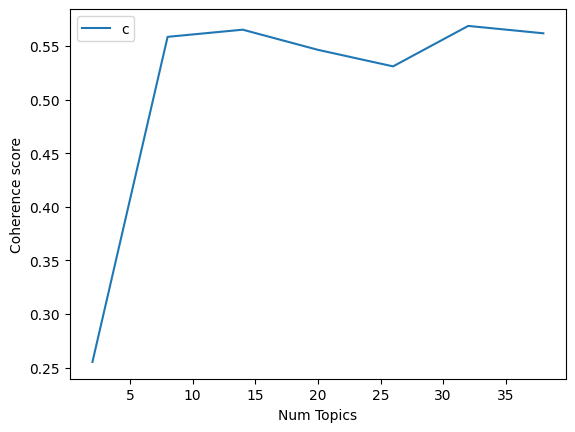

In [24]:
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
#seem

## Running LDA using TF-IDF


In [25]:
lda_model_tfidf = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus_tfidf,
    num_topics=100
    ,
    id2word=dictionary,
    passes=50,  # Nilai yang ditingkatkan
    workers=4
)

In [26]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.098*"radiasi" + 0.094*"hanif" + 0.051*"cesium" + 0.047*"banten" + 0.046*"penanganan" + 0.040*"bahaya" + 0.034*"serang" + 0.031*"peraturan" + 0.023*"industri" + 0.018*"polri"


Topic: 1 Word: 0.001*"terbukti" + 0.001*"efektif" + 0.001*"perubahan" + 0.001*"dariantara" + 0.001*"aliran" + 0.001*"menelusuri" + 0.001*"pabrik" + 0.001*"nanti" + 0.001*"pekerja" + 0.001*"tangerang"


Topic: 2 Word: 0.052*"rossi" + 0.048*"kenaikan" + 0.040*"minimum" + 0.032*"konsumsi" + 0.030*"angka" + 0.027*"valentino" + 0.025*"pekerja" + 0.019*"pangan" + 0.017*"pengusaha" + 0.016*"kuota"


Topic: 3 Word: 0.001*"kelaparan" + 0.001*"pasokan" + 0.001*"makanan" + 0.001*"bantuan" + 0.001*"sesi" + 0.001*"nyawa" + 0.001*"membutuhkan" + 0.001*"kemanusiaan" + 0.001*"truk" + 0.001*"latihan"


Topic: 4 Word: 0.086*"seni" + 0.029*"alias" + 0.023*"menyaksikan" + 0.018*"dekade" + 0.018*"fifa" + 0.017*"mengganti" + 0.016*"sederhana" + 0.015*"berasal" + 0.014*"sebelah" + 0.013*"agenda"


Topic: 5 Word: 0.092*

In [27]:
from gensim.models import CoherenceModel

coherence_model_lda_idf = CoherenceModel(model=lda_model_tfidf, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_model_lda_idf = coherence_model_lda_idf.get_coherence()
print('\nCoherence Score: ', coherence_model_lda_idf)


Coherence Score:  0.4087385182991713


## Classifying Sample Document Using LDA Bag of Words Model

In [28]:
# Asumsikan 'documents' sudah didefinisikan dari sel sebelumnya
document_num = 100

# Pastikan nomor dokumen yang dipilih valid
if 1 <= document_num <= len(documents):
    # Ambil dokumen asli (sebagai string)
    doc_sample_string = documents[document_num - 1]

    print("Original document:")
    print(doc_sample_string)

    print("\n\nTokenized and lemmatized document:")
    # Panggil fungsi preprocess dengan string asli
    print(preprocess(doc_sample_string))
else:
    print(f"Nomor dokumen {document_num} tidak valid. Mohon pilih nomor antara 1 dan {len(documents)}.")

Original document:
JARINGAN Pemantau Pendidikan Indonesia (JPPI) menyampaikan jumlah korban keracunan proyek makan bergizi gratis atauMBGper 12 Oktober 2025 tembus 11.566 anak. Koordinator Nasional JPPI Ubaid Matraji mengatakan terdapat sejumlah 1.084 korban keracunan baru dalam sepekan terakhir atau selama periode 6 hingga 12 Oktober 2025. Pilihan Editor:Persaingan Internal BGN di Tengah Keracunan Massal MBG Ubaid menilai belasan ribu anak menjadi korbankeracunan MBGini bukan sekadar kelalaian, tetapi krisis tanggung jawab publik. “Setiap pekan ribuan anak tumbang karena MBG, tapi negara justru membiarkan dapur-dapur tetap beroperasi,” ujar Ubaid melalui keterangan tertulis pada Senin, 13 Oktober 2025. Berdasarkan data yang dihimpun JPPI dan relawan di berbagai wilayah, kasus keracunan menyebar ke dua wilayah baru yang sebelumnya belum pernah dilaporkan. Dua provinsi itu adalah Kalimantan Selatan (Kabupaten Banjar) dan Gorontalo (Kota Gorontalo). “Ini menunjukkan penyebaran kasus yang

In [29]:
for i in range(len(bow_corpus)):
    print(f"\nDokumen ke-{i+1}:")
    for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: tup[1], reverse=True):
        print("\tSkor: {:.4f}\t Topik: {}".format(score, lda_model.print_topic(index, 5)))


Dokumen ke-1:
	Skor: 0.9874	 Topik: 0.139*"jabatan" + 0.077*"jenderal" + 0.070*"pertahanan" + 0.063*"darat" + 0.049*"menjabat"

Dokumen ke-2:
	Skor: 0.6070	 Topik: 0.053*"peserta" + 0.051*"perusahaan" + 0.026*"minimum" + 0.025*"bandung" + 0.023*"seluas"
	Skor: 0.2384	 Topik: 0.101*"keracunan" + 0.074*"korban" + 0.033*"bergizi" + 0.031*"gratis" + 0.026*"makan"
	Skor: 0.1410	 Topik: 0.112*"dapur" + 0.110*"sekolah" + 0.103*"makanan" + 0.045*"gizi" + 0.040*"siswa"

Dokumen ke-3:
	Skor: 0.7768	 Topik: 0.139*"jabatan" + 0.077*"jenderal" + 0.070*"pertahanan" + 0.063*"darat" + 0.049*"menjabat"
	Skor: 0.0581	 Topik: 0.093*"sipil" + 0.089*"militer" + 0.083*"ranah" + 0.078*"digital" + 0.073*"peran"
	Skor: 0.0347	 Topik: 0.077*"pesantren" + 0.052*"pendidikan" + 0.047*"apbn" + 0.041*"ponpes" + 0.035*"bangunan"
	Skor: 0.0297	 Topik: 0.095*"partai" + 0.068*"wakil" + 0.054*"pimpinan" + 0.050*"ahmad" + 0.045*"ihwal"
	Skor: 0.0254	 Topik: 0.068*"senjata" + 0.058*"korban" + 0.056*"kontak" + 0.047*"pener

In [30]:
lda_model[bow_corpus[document_num]]

[(89, 0.070574984),
 (108, 0.11817094),
 (264, 0.07401447),
 (338, 0.07568649),
 (408, 0.081768505),
 (503, 0.08540861),
 (514, 0.057237245),
 (572, 0.09113735),
 (603, 0.08722583),
 (620, 0.046372302),
 (670, 0.021648133),
 (686, 0.022833392),
 (846, 0.018631529),
 (891, 0.13138814)]

In [31]:
sorted(lda_model[bow_corpus[document_num]], key=lambda tup: tup[1], reverse=True)

[(891, 0.12877294),
 (108, 0.11263999),
 (408, 0.09140818),
 (572, 0.091004655),
 (603, 0.0875255),
 (503, 0.084673926),
 (338, 0.0750908),
 (264, 0.07256843),
 (89, 0.07135193),
 (514, 0.05721332),
 (620, 0.04669106),
 (686, 0.022696827),
 (670, 0.021718161),
 (846, 0.018634181)]

In [32]:
lda_model.print_topic(index, 581)

'0.091*"kluivert" + 0.083*"pssi" + 0.058*"pelatih" + 0.058*"evaluasi" + 0.049*"rapat" + 0.046*"skuad" + 0.044*"nanti" + 0.036*"patrick" + 0.035*"kegagalan" + 0.033*"menyeluruh" + 0.032*"babak" + 0.025*"mana" + 0.021*"mengambil" + 0.021*"belanda" + 0.020*"tentu" + 0.020*"lakukan" + 0.019*"kekalahan" + 0.018*"jauh" + 0.018*"adanya" + 0.015*"momentum" + 0.015*"komite" + 0.015*"eksekutif" + 0.013*"ditanya" + 0.011*"sekali" + 0.011*"dekat" + 0.011*"tutur" + 0.011*"saudi" + 0.010*"nasib" + 0.010*"mengevaluasi" + 0.009*"statistik" + 0.009*"manajer" + 0.009*"irak" + 0.009*"tegas" + 0.008*"asuhan" + 0.008*"sikap" + 0.007*"lanjut" + 0.007*"sekarang" + 0.006*"zona" + 0.005*"supaya" + 0.005*"mengikuti" + 0.004*"kursi" + 0.004*"keseluruhan" + 0.004*"alex" + 0.004*"rizky" + 0.004*"satunya" + 0.004*"menjabat" + 0.004*"perjalanan" + 0.004*"enggan" + 0.004*"dimiliki" + 0.004*"kinerja" + 0.004*"dibahas" + 0.004*"sosok" + 0.004*"tadi" + 0.004*"detail" + 0.004*"dipakai" + 0.004*"menyebutkan" + 0.004*"pria

## Classifying Sample Document Using LDA TF-IDF Model

In [33]:
# Cek hasil dari model
result = lda_model_tfidf[bow_corpus[document_num]]
print(f"Hasil dari model: {result}")

# Jika hasilnya tidak kosong, jalankan perulangan
if result:
    for index, score in sorted(result, key=lambda tup: tup[1], reverse=True):
        print(f"Skor: {score}\tTopik: {lda_model_tfidf.print_topic(index, 5)}")

Hasil dari model: [(7, 0.08286038), (13, 0.1852322), (21, 0.01955343), (26, 0.01010965), (29, 0.044629894), (80, 0.018839782), (84, 0.309042), (87, 0.02295084), (88, 0.25898674), (93, 0.03112213)]
Skor: 0.3090420067310333	Topik: 0.051*"saham" + 0.044*"pasal" + 0.034*"komisaris" + 0.033*"miliar" + 0.031*"undang"
Skor: 0.2589867413043976	Topik: 0.057*"tersangka" + 0.047*"kejaksaan" + 0.044*"korupsi" + 0.036*"jaksa" + 0.033*"agung"
Skor: 0.18523220717906952	Topik: 0.027*"tahanan" + 0.027*"peristiwa" + 0.022*"kebudayaan" + 0.014*"mendadak" + 0.013*"disiplin"
Skor: 0.08286038041114807	Topik: 0.007*"perusahaan" + 0.007*"industri" + 0.007*"partai" + 0.007*"proyek" + 0.006*"masing"
Skor: 0.04462989419698715	Topik: 0.075*"israel" + 0.054*"gaza" + 0.037*"trump" + 0.034*"palestina" + 0.029*"senjata"
Skor: 0.031122129410505295	Topik: 0.034*"keracunan" + 0.033*"aksi" + 0.031*"makan" + 0.027*"korban" + 0.026*"gratis"
Skor: 0.02295083925127983	Topik: 0.083*"pesantren" + 0.069*"ponpes" + 0.055*"khozin

## Testing Model on Unseen Document

In [34]:
unseen_documents = [
    "Pemerintah berencana menaikkan harga bahan bakar minyak bulan depan untuk menekan subsidi energi.",
    "Timnas Indonesia berhasil lolos ke semifinal Piala Asia setelah mengalahkan Jepang dengan skor 2-1.",
    "Peneliti menemukan vaksin baru yang mampu meningkatkan kekebalan tubuh terhadap varian terbaru virus corona.",
    "Bank Indonesia memperkirakan inflasi tahun 2025 akan tetap terkendali meski ada tekanan dari harga pangan.",
    "Samsung memperkenalkan teknologi layar lipat generasi baru dengan daya tahan yang lebih kuat dan ringan.",
    "Kementerian Pendidikan meluncurkan program digitalisasi sekolah untuk mempercepat transformasi pendidikan nasional."
]

# Gunakan dictionary internal dari model, bukan yang mungkin berubah
dictionary = lda_model_tfidf.id2word

# Testing dokumen baru
for i, unseen_doc in enumerate(unseen_documents):
    bow_vector = dictionary.doc2bow(preprocess(unseen_doc), allow_update=False)
    print(f"\n--- Analisis Dokumen ke-{i+1} ({unseen_doc}) ---")

    if bow_vector:
        for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: tup[1], reverse=True):
            print(f"Skor: {score:.4f}\tTopik: {lda_model_tfidf.print_topic(index, 5)}")
    else:
        print("Tidak ada kata yang terdeteksi di dokumen ini.")


--- Analisis Dokumen ke-1 (Pemerintah berencana menaikkan harga bahan bakar minyak bulan depan untuk menekan subsidi energi.) ---
Skor: 0.3347	Topik: 0.007*"perusahaan" + 0.007*"industri" + 0.007*"partai" + 0.007*"proyek" + 0.006*"masing"
Skor: 0.2228	Topik: 0.079*"dapur" + 0.072*"makanan" + 0.045*"bergizi" + 0.034*"gizi" + 0.031*"jangka"
Skor: 0.1123	Topik: 0.074*"pangan" + 0.073*"harga" + 0.066*"pertanian" + 0.061*"jabatan" + 0.043*"arief"
Skor: 0.1123	Topik: 0.056*"penumpang" + 0.042*"layanan" + 0.030*"pertumbuhan" + 0.029*"subianto" + 0.029*"naik"
Skor: 0.1123	Topik: 0.047*"bagnaia" + 0.043*"gelar" + 0.037*"sesi" + 0.037*"ducati" + 0.031*"latihan"

--- Analisis Dokumen ke-2 (Timnas Indonesia berhasil lolos ke semifinal Piala Asia setelah mengalahkan Jepang dengan skor 2-1.) ---
Skor: 0.2660	Topik: 0.059*"putra" + 0.058*"korea" + 0.052*"skor" + 0.046*"putri" + 0.045*"fikri"
Skor: 0.2525	Topik: 0.034*"keracunan" + 0.033*"aksi" + 0.031*"makan" + 0.027*"korban" + 0.026*"gratis"
Skor: 

## Tugas LDA


In [36]:
# --- Bagian 1: Memuat dan Menyiapkan Data ---
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer
import io

try:
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except Exception as e:
    print(f"Gagal mengunduh data NLTK: {e}")

try:
    data = pd.read_csv('tempo_berita.csv', on_bad_lines='skip')
    documents = data['isi_berita'].values.tolist()
    print(f"Total {len(documents)} dokumen berhasil dimuat.")

except (FileNotFoundError, KeyError) as e:
    print(f"Error: Terjadi kesalahan saat memuat data. {e}")
    documents = []

# --- Bagian 2: Preprocessing Teks ---
if documents:
    def lemmatize_stemming(text):
        stemmer = WordNetLemmatizer()
        return stemmer.lemmatize(text, pos='v')

    stop_words = stopwords.words('indonesian')

    def tokenisasi_dan_filter(teks):
        return [
            lemmatize_stemming(kata)
            for kata in simple_preprocess(str(teks))
            if kata not in stop_words and len(kata) > 2
        ]

    data_token = [tokenisasi_dan_filter(teks) for teks in documents]

    kamus = Dictionary(data_token)
    kamus.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
    korpus = [kamus.doc2bow(teks) for teks in data_token]

    num_topik = 20
    lda_model = LdaModel(
        korpus,
        num_topics=num_topik,
        id2word=kamus,
        passes=50,
        random_state=100
    )

    # --- Bagian 3: Membuat Tabel Proporsi Kata dalam Topik ---
    all_topics = lda_model.show_topics(num_topics=num_topik, num_words=20, formatted=False)

    proporsi_kata = []
    for topic_id, word_weights in all_topics:
        for word, weight in word_weights:
            proporsi_kata.append([f"Topik {topic_id}", word, weight])

    df_proporsi_kata = pd.DataFrame(proporsi_kata, columns=['Topik', 'Kata', 'Proporsi'])
    print("\n--- Tabel 1: Proporsi Kata dalam Topik ---")
    print(df_proporsi_kata)

    # --- Bagian 4: Membuat Tabel Proporsi Topik dalam Dokumen ---
    proporsi_topik = []
    for i, doc_bow in enumerate(korpus):
        doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)

        row_data = {'Dokumen ID': i}
        for topic_id, proporsi in doc_topics:
            row_data[f"Topik {topic_id}"] = proporsi

        proporsi_topik.append(row_data)

    df_proporsi_topik = pd.DataFrame(proporsi_topik).fillna(0)
    cols = ['Dokumen ID'] + [f'Topik {i}' for i in range(num_topik)]
    df_proporsi_topik = df_proporsi_topik[cols]
    print("\n--- Tabel 2: Proporsi Topik dalam Dokumen ---")
    print(df_proporsi_topik)

    # --- Bagian 5: Menyimpan dan Mengunduh File CSV Otomatis ---
    # Simpan DataFrame pertama ke file CSV yang berbeda
    csv_file1 = "proporsi_dokumen.csv"
    df_proporsi_topik.to_csv(csv_file1, index=False)

    # Simpan DataFrame kedua ke file CSV yang berbeda
    csv_file2 = "proporsi_kata.csv"
    df_proporsi_kata.to_csv(csv_file2, index=False)

    print(f"\nFile '{csv_file1}' dan '{csv_file2}' berhasil dibuat dan siap diunduh.")

    # Anda bisa menggunakan kode ini untuk mengunduh file secara terpisah
    # files.download(csv_file1)
    # files.download(csv_file2)

else:
    print("Tidak dapat melanjutkan karena data dokumen tidak tersedia.")

Total 900 dokumen berhasil dimuat.

--- Tabel 1: Proporsi Kata dalam Topik ---
        Topik       Kata  Proporsi
0     Topik 0      gempa  0.036265
1     Topik 0        kpk  0.034133
2     Topik 0       laut  0.030090
3     Topik 0      utara  0.026886
4     Topik 0      pulau  0.021259
..        ...        ...       ...
395  Topik 19  mahasiswa  0.009641
396  Topik 19  peringkat  0.009211
397  Topik 19     unggul  0.008993
398  Topik 19      wakil  0.008233
399  Topik 19      atlet  0.008015

[400 rows x 3 columns]

--- Tabel 2: Proporsi Topik dalam Dokumen ---
     Dokumen ID   Topik 0   Topik 1   Topik 2   Topik 3   Topik 4   Topik 5  \
0             0  0.017559  0.000610  0.000610  0.000610  0.000610  0.000610   
1             1  0.000602  0.000602  0.000602  0.000602  0.000602  0.000602   
2             2  0.000625  0.000625  0.000625  0.000625  0.000625  0.000625   
3             3  0.000365  0.000365  0.000365  0.000365  0.000365  0.045772   
4             4  0.000820  0.000820

## Klasifikasi

In [37]:
pip install gensim scikit-learn pandas

In [39]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import ast
import gensim
from gensim.utils import simple_preprocess
import numpy as np
import os
import warnings

warnings.filterwarnings("ignore")

# --- 1. Memuat dan Menyiapkan Data ---
file_path = 'tempo_berita.csv'   # pastikan file ini sudah diupload di Colab
text_column = 'isi_berita'               # kolom berisi teks/token
label_column = 'kategori_berita'                # kolom label kategori

try:
    df = pd.read_csv(file_path)
    if text_column not in df.columns or label_column not in df.columns:
        print(f"❌ Error: Kolom '{text_column}' atau '{label_column}' tidak ditemukan.")
        print(f"Kolom tersedia: {list(df.columns)}")
        raise SystemExit
    df = df[[text_column, label_column]].copy()
    print("✅ Data berhasil dimuat.")
except FileNotFoundError:
    raise SystemExit(f"❌ File '{file_path}' tidak ditemukan di direktori kerja.")

# --- 2. Normalisasi Kolom Token ---
def detect_list_format(sample):
    """Deteksi apakah kolom berisi list (misalnya ['kata']) atau teks biasa."""
    if isinstance(sample, str) and sample.strip().startswith('[') and sample.strip().endswith(']'):
        return "list"
    return "text"

if not df[text_column].dropna().empty:
    sample_data = str(df[text_column].dropna().iloc[0])
    data_format = detect_list_format(sample_data)
else:
    data_format = "unknown"

print(f"📄 Format data terdeteksi: {data_format}")

def normalize_tokens(value):
    """Pastikan setiap entri menjadi list token yang valid."""
    if isinstance(value, list):
        return [t for t in value if isinstance(t, str) and t.strip() != ""]
    if isinstance(value, str):
        value = value.strip()
        if value.startswith('[') and value.endswith(']'):
            try:
                parsed = ast.literal_eval(value)
                if isinstance(parsed, list):
                    return [t for t in parsed if isinstance(t, str) and t.strip() != ""]
            except Exception:
                pass
        # Jika string biasa, tokenize dengan gensim
        return simple_preprocess(value)
    return []

# Terapkan normalisasi
df['tokens'] = df[text_column].apply(normalize_tokens)

# Hitung jumlah dokumen kosong & tidak kosong
total_docs = len(df)
nonempty_docs = df['tokens'].apply(len).gt(0).sum()
empty_docs = total_docs - nonempty_docs
print(f"📊 Total dokumen: {total_docs}, Non-kosong: {nonempty_docs}, Kosong: {empty_docs}")

# Hapus baris kosong
df = df[df['tokens'].apply(len) > 0].reset_index(drop=True)
if df.empty:
    raise SystemExit("❌ Tidak ada dokumen berisi token setelah normalisasi. Periksa isi file CSV.")

# --- 3. Membuat Dictionary & Corpus untuk LDA ---
dictionary = gensim.corpora.Dictionary(df['tokens'])
if len(dictionary) == 0:
    raise SystemExit("❌ Dictionary kosong. Tidak ada kata yang bisa dipelajari.")
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]
print(f"📘 Jumlah term unik: {len(dictionary)} | Jumlah dokumen: {len(corpus)}")

# --- 4. Pelatihan Model LDA ---
num_topics = min(8, len(df[label_column].unique()))  # jumlah topik disesuaikan jumlah kategori
workers = max(1, min(4, os.cpu_count() or 1))

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    num_topics=num_topics,
    id2word=dictionary,
    passes=900,
    workers=workers,
    random_state=42
)

print("✅ Model LDA berhasil dilatih.")

# --- 5. Mendapatkan vektor topik untuk setiap dokumen ---
def get_topic_vector(lda_model, bow_vector, num_topics):
    topic_weights = np.zeros(num_topics)
    topic_scores = lda_model.get_document_topics(bow_vector)
    for topic_id, score in topic_scores:
        if 0 <= topic_id < num_topics:
            topic_weights[topic_id] = score
    return topic_weights

X = np.array([get_topic_vector(lda_model, doc, num_topics) for doc in corpus])
y = df[label_column].values

# --- 6. Pelatihan & Evaluasi Logistic Regression ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- 7. Evaluasi Model ---
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

print("\n--- 📈 Hasil Klasifikasi ---")
print(f"Akurasi Model: {accuracy:.4f}\n")
print("Laporan Klasifikasi:")
print(report)

# --- 8. Menampilkan Top Kata Tiap Topik ---
print("\n--- 🔍 Top Kata per Topik (Top 10) ---")
for t in range(num_topics):
    print(f"Topik {t}: ", [word for word, prob in lda_model.show_topic(t, topn=10)])

print("\nProses selesai.")

✅ Data berhasil dimuat.
📄 Format data terdeteksi: text
📊 Total dokumen: 900, Non-kosong: 900, Kosong: 0
📘 Jumlah term unik: 21092 | Jumlah dokumen: 900
✅ Model LDA berhasil dilatih.

--- 📈 Hasil Klasifikasi ---
Akurasi Model: 0.5556

Laporan Klasifikasi:
               precision    recall  f1-score   support

      ekonomi       0.75      0.45      0.56        20
      hiburan       0.72      0.65      0.68        20
        hukum       0.23      0.15      0.18        20
internasional       0.62      0.90      0.73        20
   lingkungan       0.50      0.40      0.44        20
     olahraga       0.50      0.25      0.33        20
     otomotif       0.56      0.75      0.64        20
      politik       0.30      0.45      0.36        20
    sepakbola       0.80      1.00      0.89        20

     accuracy                           0.56       180
    macro avg       0.55      0.56      0.54       180
 weighted avg       0.55      0.56      0.54       180


--- 🔍 Top Kata per Topik (